In [1]:
import numpy as np
import pandas as pd

# Cleaning

In [2]:
df = pd.read_parquet('../../Data/lichess-sampled.parquet')
df.head()

,Event,Site,White,Black,Result,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,TimeControl,Termination,Moves,WhiteTitle,BlackTitle,LichessId,Date
0,Classical,https://lichess.org/a9tcp02g,Desmond_Wilson,savinka59,White,1654.0,1919.0,19.0,-22.0,D04,480+2,Normal,1. d4 d5 2. Nf3 Nf6 3. e3 Bf5 4. Nh4 Bg6 5. Nx...,NaN,NaN,<NA>,2012-12-31 23:04:12
1,Classical,https://lichess.org/iclkx584,Voltvolf,Marzinkus,White,1824.0,1811.0,11.0,-11.0,C02,360+6,Normal,1. e4 e6 2. d4 d5 3. e5 c5 4. c3 Ne7 5. f4 cxd...,NaN,NaN,<NA>,2012-12-31 23:10:00
2,Classical,https://lichess.org/ufcqmfxx,6WX,adamsrj,White,1463.0,1504.0,62.0,-12.0,C44,1560+30,Normal,1. e4 e5 2. Nf3 Nc6 3. Bc4 Be7 4. d4 exd4 5. N...,NaN,NaN,<NA>,2012-12-31 23:16:04
3,Classical,https://lichess.org/qwuudn2s,sebastian44,jtkjtkful,Black,1347.0,1519.0,-6.0,23.0,B01,300+5,Time forfeit,1. e4 d5 2. e5 d4 3. Nf3 Nc6 4. c3 d3 5. Na3 f...,NaN,NaN,<NA>,2012-12-31 23:24:11
4,Classical,https://lichess.org/c9qfp8es,peter2,Killi,Black,1519.0,1572.0,-9.0,9.0,C28,480+0,Normal,1. e4 Nc6 2. Nc3 e5 3. Bc4 Nf6 4. d3 h6 5. f3 ...,NaN,NaN,<NA>,2013-01-01 00:51:20


In [3]:
df.shape

(4286409, 17)

In [4]:
df.columns

Index(['Event', 'Site', 'White', 'Black', 'Result', 'WhiteElo', 'BlackElo',
       'WhiteRatingDiff', 'BlackRatingDiff', 'ECO', 'TimeControl',
       'Termination', 'Moves', 'WhiteTitle', 'BlackTitle', 'LichessId',
       'Date'],
      dtype='object')

In [5]:
df.dtypes

Event                      string
Site                       string
White                      string
Black                      string
Result                   category
WhiteElo                  float64
BlackElo                  float64
WhiteRatingDiff           float64
BlackRatingDiff           float64
ECO                      category
TimeControl                string
Termination              category
Moves                      string
WhiteTitle               category
BlackTitle               category
LichessId                  string
Date               datetime64[ns]
dtype: object

In [6]:
time_lim = []
time_inc = []
for tc in df['TimeControl']:
    tc_split = tc.split('+')
    time_lim.append(tc_split[0])
    time_inc.append(tc_split[1])
    
df['TimeLim'] = time_lim
df['TimeInc'] = time_inc
df['TimeLim'] = df['TimeLim'].astype('int32')
df['TimeInc'] = df['TimeInc'].astype('int32')

In [7]:
df = df.drop('TimeControl',axis=1)
df.head()

,Event,Site,White,Black,Result,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Termination,Moves,WhiteTitle,BlackTitle,LichessId,Date,TimeLim,TimeInc
0,Classical,https://lichess.org/a9tcp02g,Desmond_Wilson,savinka59,White,1654.0,1919.0,19.0,-22.0,D04,Normal,1. d4 d5 2. Nf3 Nf6 3. e3 Bf5 4. Nh4 Bg6 5. Nx...,NaN,NaN,<NA>,2012-12-31 23:04:12,480,2
1,Classical,https://lichess.org/iclkx584,Voltvolf,Marzinkus,White,1824.0,1811.0,11.0,-11.0,C02,Normal,1. e4 e6 2. d4 d5 3. e5 c5 4. c3 Ne7 5. f4 cxd...,NaN,NaN,<NA>,2012-12-31 23:10:00,360,6
2,Classical,https://lichess.org/ufcqmfxx,6WX,adamsrj,White,1463.0,1504.0,62.0,-12.0,C44,Normal,1. e4 e5 2. Nf3 Nc6 3. Bc4 Be7 4. d4 exd4 5. N...,NaN,NaN,<NA>,2012-12-31 23:16:04,1560,30
3,Classical,https://lichess.org/qwuudn2s,sebastian44,jtkjtkful,Black,1347.0,1519.0,-6.0,23.0,B01,Time forfeit,1. e4 d5 2. e5 d4 3. Nf3 Nc6 4. c3 d3 5. Na3 f...,NaN,NaN,<NA>,2012-12-31 23:24:11,300,5
4,Classical,https://lichess.org/c9qfp8es,peter2,Killi,Black,1519.0,1572.0,-9.0,9.0,C28,Normal,1. e4 Nc6 2. Nc3 e5 3. Bc4 Nf6 4. d3 h6 5. f3 ...,NaN,NaN,<NA>,2013-01-01 00:51:20,480,0


In [8]:
df.White.value_counts()

Snowden       961
drums         741
v_clava38     733
cleoplatre    662
billooji      648
             ... 
ultrix          1
appu04          1
Whonderr        1
tadic42         1
kerimboi        1
Name: White, Length: 860273, dtype: Int64

In [9]:
df.Black.value_counts()

Snowden       917
v_clava38     706
jaybird       685
cleoplatre    662
capobruno     639
             ... 
b4b3k1337       1
Mimichor        1
SoulSchach      1
smnlel16        1
Emrecevo23      1
Name: Black, Length: 874663, dtype: Int64

In [10]:
cross = pd.crosstab(df.ECO,df.Termination)
cross

Termination,Abandoned,Normal,Rules infraction,Time forfeit,Unterminated
ECO,,,,,
?,7255,1148,0,1815,1
A00,312,186023,45,35168,0
A01,49,25732,5,4393,0
A02,57,11420,1,1981,0
A03,3,10972,8,1945,0
...,...,...,...,...,...
E94,0,454,1,49,0
E95,0,25,0,3,0
E97,0,261,0,36,0


In [11]:
# opening to how game ends
cross.sort_values(by='Normal',ascending=False)

Termination,Abandoned,Normal,Rules infraction,Time forfeit,Unterminated
ECO,,,,,
A00,312,186023,45,35168,0
C20,17,184213,37,35791,0
D00,19,173366,40,29812,0
B01,13,159107,43,26977,0
C41,21,155837,26,25295,0
...,...,...,...,...,...
A99,0,1,0,1,0
B69,0,1,0,0,0
A79,0,1,0,0,0


In [12]:
cross = pd.crosstab(df.ECO,df.Result)

In [13]:
cross = cross.div(cross.sum(axis=1), axis=0).round(2)
cross

Result,Black,Draw,Unknown,White
ECO,,,,
?,0.91,0.00,0.05,0.04
A00,0.52,0.04,0.00,0.43
A01,0.48,0.04,0.00,0.47
A02,0.46,0.05,0.00,0.49
A03,0.49,0.05,0.00,0.46
...,...,...,...,...
E94,0.48,0.05,0.00,0.47
E95,0.21,0.04,0.00,0.75
E97,0.46,0.08,0.00,0.46


# Ply and More Complicated Statistics

In [14]:
titled1 = df[df.WhiteTitle.isnull() == False]

In [15]:
titled2 = df[df.BlackTitle.isnull() == False]

In [16]:
titled = pd.concat([titled1,titled2],join='outer')

In [17]:
bot1 = df[df.BlackTitle == 'BOT']
bot2 = df[df.WhiteTitle == 'BOT']

In [18]:
# 0.07% of games are played in part by a bot
pd.concat([bot1,bot2],join='outer').shape[0]/df.shape[0]

0.0007729080449392487

In [19]:
# 0.16% games are played with titled players
titled.shape[0]/df.shape[0]

0.0016911591964275923

In [20]:
# A00 is unknown, C20 is kings pawn games makes sense
df.ECO.value_counts()

A00    221548
C20    220058
D00    203237
B01    186140
C41    181179
        ...  
E58         2
E78         1
D72         1
A79         1
B69         1
Name: ECO, Length: 498, dtype: int64

In [21]:
# 5% of games are kings pawn games
df[df.ECO == 'C20'].shape[0]/df.shape[0]

0.05133854468857265

In [22]:
kings_pawn = df[df.ECO == 'C20']

# Extracting Analysis

In [23]:
games_with_analysis = df[df.Moves.str.contains("{")]
games_with_analysis = games_with_analysis[games_with_analysis.Moves.str.contains("%eval")]

In [24]:
games_with_analysis.shape

(806241, 18)

In [25]:
games_with_analysis.shape[0]/df.shape[0]

0.1880924102203033

around 67.6% of games have time control or analysis
only 18.9% of games have analysis

In [26]:
moves = games_with_analysis.Moves.reset_index().drop('index',axis=1)

In [27]:
moves

,Moves
0,1. e4 { [%eval 0.19] } 1... b6 { [%eval 0.65] ...
1,1. e4 { [%eval 0.12] } 1... c6 { [%eval 0.53] ...
2,1. d4 { [%eval 0.22] } 1... d5 { [%eval 0.31] ...
3,1. d4 { [%eval 0.28] } 1... d5 { [%eval 0.28] ...
4,1. e4 { [%eval 0.11] } 1... e5 { [%eval 0.17] ...
...,...
806236,1. e4 { [%eval 0.2] [%clk 0:30:00] } 1... d5?!...
806237,1. e4 { [%eval 0.2] [%clk 0:45:00] } 1... e5 {...
806238,1. d4 { [%eval 0.0] [%clk 0:30:00] } 1... d5 {...
806239,1. e4 { [%eval 0.2] [%clk 1:00:00] } 1... d6 {...


### Standard move notation for good/bad/etc moves
? mistake

?? blunder

?! dubious

!? interesting NOTE: doesn't exist on lichess evals

!! brilliant NOTE: doesn't exist on lichess evals

! good NOTE: doesn't exist on lichess evals

In [28]:
# get kind of move for each move
mistake_arr_white = []
blunder_arr_white = []
dubious_arr_white = []

mistake_arr_black = []
blunder_arr_black = []
dubious_arr_black = []

isWhite = True
for value in moves.values:
    value = str(value)
    split_up = value.split(" {")[1:-1]
    mistake_white = 0
    blunder_white = 0
    dubious_white = 0
    mistake_black = 0
    blunder_black = 0
    dubious_black = 0
    
    for m in split_up:
        ply_string = m.split(" }")[1]
        if(isWhite):
            if(ply_string[-2:] == "?!"):
                dubious_white+=1
            elif(ply_string[-2:] == "??"): 
                blunder_white+=1
            elif(ply_string[-1:] == "?"): 
                mistake_white+=1
        else:
            if(ply_string[-2:] == "?!"):
                dubious_black+=1
            elif(ply_string[-2:] == "??"): 
                blunder_black+=1
            elif(ply_string[-1:] == "?"): 
                mistake_black+=1
        if(isWhite):
            isWhite = False
        else:
            isWhite = True
    mistake_arr_white.append(mistake_white)
    blunder_arr_white.append(blunder_white)
    dubious_arr_white.append(dubious_white)
    mistake_arr_black.append(mistake_black)
    blunder_arr_black.append(blunder_black)
    dubious_arr_black.append(dubious_black)

In [41]:
move_analysis_df = pd.DataFrame()
move_analysis_df['site'] = games_with_analysis.reset_index().Site
move_analysis_df['white_dubious'] = dubious_arr_white
move_analysis_df['white_mistake'] = mistake_arr_white
move_analysis_df['white_blunder'] = blunder_arr_white
move_analysis_df['black_dubious'] = dubious_arr_black
move_analysis_df['black_mistake'] = mistake_arr_black
move_analysis_df['black_blunder'] = blunder_arr_black

In [43]:
# get evaluation for each move
average_eval = []
swing = []
black_favor = []
white_favor = []
largest_eval = []
smallest_eval = []
for value in moves.values:
    # these values are arbitrarily large, evaluation like this would not occur
    min_eval = 1000
    max_eval = -1000
    eval_sum = 0
    in_white_favor = 0
    in_black_favor = 0
    value = str(value)
    split_up = value.split(" {")[1:]
    for m in split_up:
        eval_val = m.split(" }")[0].split(" ")[2][:-1]
#         print(eval_val)
        if(eval_val[0]!="#" and ":" not in eval_val):
            eval_val = float(eval_val)
            if(eval_val < min_eval):
                min_eval = eval_val
            if(eval_val > max_eval):
                max_eval = eval_val
            eval_sum += eval_val
            if(eval_val > 0):
                in_white_favor += 1
            elif(eval_val < 0):
                in_black_favor += 1
#     print(len(average_eval))
    average_eval.append(eval_sum/len(split_up))
    swing.append(max_eval-min_eval)
    largest_eval.append(max_eval)
    smallest_eval.append(min_eval)
    white_favor.append(in_white_favor/len(split_up))
    black_favor.append(in_black_favor/len(split_up))

In [44]:
move_analysis_df['swing'] = swing
move_analysis_df['black_favor'] = black_favor
move_analysis_df['white_favor'] = white_favor
move_analysis_df['average_eval'] = average_eval
move_analysis_df['largest_eval'] = largest_eval
move_analysis_df['smallest_eval'] = smallest_eval
move_analysis_df

,site,white_dubious,white_mistake,white_blunder,black_dubious,black_mistake,black_blunder,swing,black_favor,white_favor,average_eval,largest_eval,smallest_eval
0,https://lichess.org/23why19h,4,14,6,5,10,8,18.72,0.231579,0.736842,2.058632,13.59,-5.13
1,https://lichess.org/xb7z7b1z,8,5,3,6,5,5,57.31,0.631579,0.252632,-2.217579,5.89,-51.42
2,https://lichess.org/0x21vc15,3,1,2,1,3,0,59.61,0.202532,0.797468,7.840759,58.48,-1.13
3,https://lichess.org/vix41aow,9,4,3,9,7,2,140.86,0.364865,0.405405,3.897027,134.50,-6.36
4,https://lichess.org/dz7nz129,6,4,0,0,1,0,9.72,0.580247,0.271605,-0.886420,1.50,-8.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
806236,https://lichess.org/l7S6reSW,2,1,1,2,2,1,13.71,0.473684,0.500000,-3.026053,4.96,-8.75
806237,https://lichess.org/yO3tIOi2,2,3,2,0,0,1,11.23,0.578947,0.263158,-2.980526,0.37,-10.86
806238,https://lichess.org/xG1zXN45,1,0,1,0,0,0,7.21,0.000000,0.777778,1.896667,7.21,0.00
806239,https://lichess.org/rxFETXto,0,4,0,3,1,2,12.17,0.500000,0.458333,-1.628750,4.04,-8.13


In [45]:
# average evaluation
# % of game in favor of each color
# move with largest swing in evaluation, the swing in evaluation
# explosivity: difference in highest and lowest values

In [54]:
move_analysis_df['WhiteElo'] = games_with_analysis.reset_index()['WhiteElo']
move_analysis_df['BlackElo'] = games_with_analysis.reset_index()['BlackElo']
move_analysis_df['All_White_Errors'] = move_analysis_df.reset_index()['white_dubious']+move_analysis_df.reset_index()['white_mistake']+move_analysis_df.reset_index()['white_blunder']
move_analysis_df['All_Black_Errors'] = move_analysis_df.reset_index()['black_dubious']+move_analysis_df.reset_index()['black_mistake']+move_analysis_df.reset_index()['black_blunder']
move_analysis_df.head()

,site,white_dubious,white_mistake,white_blunder,black_dubious,black_mistake,black_blunder,swing,black_favor,white_favor,average_eval,largest_eval,smallest_eval,WhiteElo,BlackElo,All_White_Mistakes,All_Black_Mistakes
0,https://lichess.org/23why19h,4,14,6,5,10,8,18.72,0.231579,0.736842,2.058632,13.59,-5.13,1625.0,1634.0,24,23
1,https://lichess.org/xb7z7b1z,8,5,3,6,5,5,57.31,0.631579,0.252632,-2.217579,5.89,-51.42,1647.0,1663.0,16,16
2,https://lichess.org/0x21vc15,3,1,2,1,3,0,59.61,0.202532,0.797468,7.840759,58.48,-1.13,1287.0,1636.0,6,4
3,https://lichess.org/vix41aow,9,4,3,9,7,2,140.86,0.364865,0.405405,3.897027,134.50,-6.36,1488.0,1379.0,16,18
4,https://lichess.org/dz7nz129,6,4,0,0,1,0,9.72,0.580247,0.271605,-0.886420,1.50,-8.22,1671.0,1735.0,10,1


<AxesSubplot:xlabel='WhiteElo', ylabel='white_blunder'>

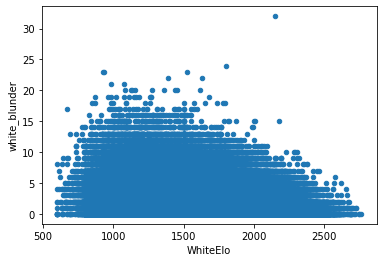

In [47]:
move_analysis_df.plot.scatter(x='WhiteElo',y='white_blunder')

<AxesSubplot:xlabel='BlackElo', ylabel='black_blunder'>

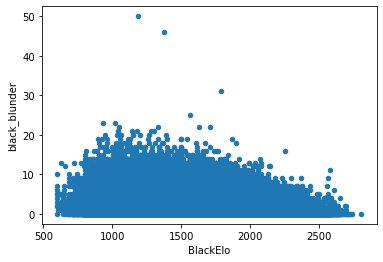

In [69]:
move_analysis_df.plot.scatter(x='BlackElo',y='black_blunder')

<AxesSubplot:xlabel='WhiteElo', ylabel='All_White_Mistakes'>

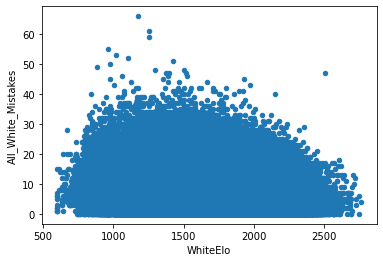

In [49]:
move_analysis_df.plot.scatter(x='WhiteElo',y='All_White_Mistakes')

<AxesSubplot:xlabel='WhiteElo', ylabel='All_Black_Mistakes'>

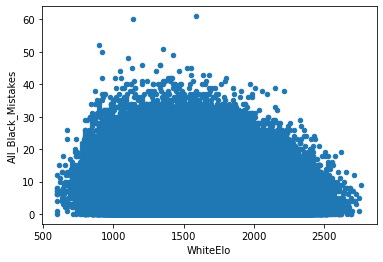

In [50]:
move_analysis_df.plot.scatter(x='WhiteElo',y='All_Black_Mistakes')

In [51]:
move_analysis_df['white_blunder'].value_counts(ascending=True).head()

32    1
24    1
22    2
21    2
23    3
Name: white_blunder, dtype: int64

In [52]:
move_analysis_df[move_analysis_df['white_blunder']==32]

,site,white_dubious,white_mistake,white_blunder,black_dubious,black_mistake,black_blunder,swing,black_favor,white_favor,average_eval,largest_eval,smallest_eval,WhiteElo,BlackElo,All_White_Mistakes,All_Black_Mistakes
676186,https://lichess.org/V62que9r,2,6,32,2,6,31,124.2,0.257143,0.342857,0.558786,68.76,-55.44,2146.0,1792.0,40,39


In [53]:
# https://lichess.org/V62que9r#0 this game is insane, we should look at it in the presentation

In [68]:
# means
(move_analysis_df['black_favor']+move_analysis_df['white_favor'])[(move_analysis_df['black_favor']+move_analysis_df['white_favor'])>0.01].min()

0.08415841584158416